In [1]:
html.eval('''<h1 style="text-align: center;">Aufgabe 1</h1>
          <h2 style="text-align: center;">
              Angewandte Mathematik
          </h2>
          <h4 style="text-align: center;">
              von Alexander M. Westphal, Klaus Riedl, Robert Taglauer
          </h4>''')

<h1 style="text-align: center;">Aufgabe 1</h1>
          <h2 style="text-align: center;">
              Angewandte Mathematik
          </h2>
          <h4 style="text-align: center;">
              von Alexander M. Westphal, Klaus Riedl, Robert Taglauer
          </h4>

In [2]:
html.eval('''<h1 style="text-align: left;">Aufgabe: 1a und 1b</h1>''')

<h1 style="text-align: left;">Aufgabe: 1a und 1b</h1>

Anzahl der Iterationen >> 5


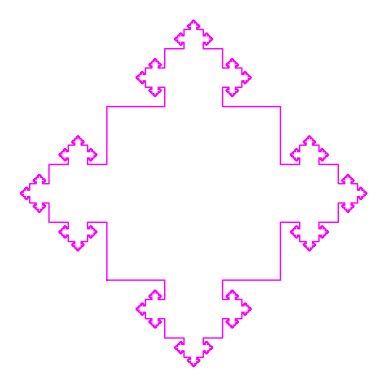

Rekursionsschritt: 5
Umfang (in LE) 17.333


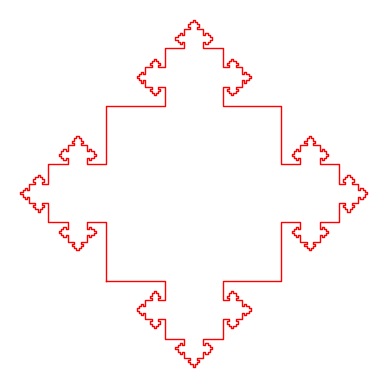

Rekursionsschritt: 4
Umfang (in LE) 14.667


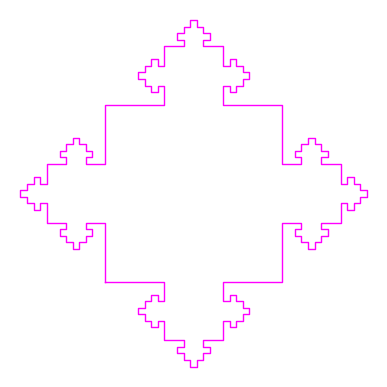

Rekursionsschritt: 3
Umfang (in LE) 12.000


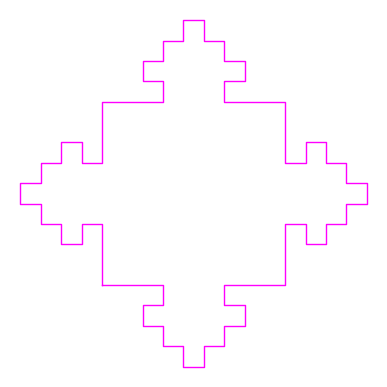

Rekursionsschritt: 2
Umfang (in LE) 9.3333


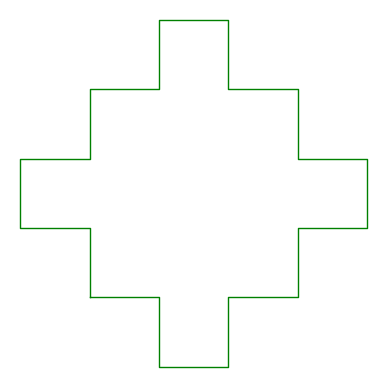

Rekursionsschritt: 1
Umfang (in LE) 6.6667


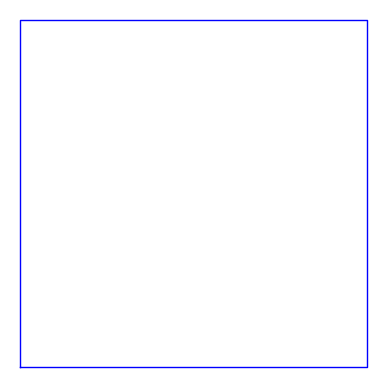

Rekursionsschritt: 0
Umfang (in LE) 4.0000


In [11]:
colors = ['red', 'green', 'blue', 'magenta', 'cyan']

def Knick (x,y, knicklevel):
    '''
    Methode die zwischen zwei Punkten den ersten knick berechnet 
    Hierzu werden Vektoren genutzt und dann spitzen - fuß um den Vektor zu bekommen
    diesen mit 1/3 bzw 2/3 (knicklevel) multiplizieren abhänig 
    vom gewünschten knick und dem Fuß addieren
    '''
    return(list((vector(y) - vector(x)) * knicklevel + vector(x)))


def punkteDazwischen(x,y):
    return [rotate(Knick(x,y, 2/3),pi/2,Knick(x,y, 1/3)),rotate(Knick(x,y, 1/3),-pi/2,Knick(x,y,2/3))]

def rotate(x,alpha,y):
    '''
    Berechnet die Rotation
    '''
    return list((Matrix([[cos(alpha), -sin(alpha)], [sin(alpha), cos(alpha)]])*(vector(x)-vector(y))+vector(y)))

def wachstum(x,y):
    '''
    Methode die den Wachstum von einem Iterationsschritt zu einem neuen brechnet
    '''
    return [x,Knick(x,y,1/3)] + punkteDazwischen(x,y) + [Knick(x,y,2/3),y]

def quadratKochCurve(x,y,iterations):
    '''
    Methode die sich rekursive aufruft und immer 
    '''
    g = wachstum(x,y)
    if (iterations == 0): return [x,y]
    elif (iterations == 1): return g
    else:
        return (quadratKochCurve(g[0],g[1],0) + 
                quadratKochCurve(g[1],g[2],iterations-1) + 
                quadratKochCurve(g[2],g[3],iterations-1) + 
                quadratKochCurve(g[3],g[4],iterations-1) +
                quadratKochCurve(g[4],g[5],0))


def umfang(iterations):
    '''
    Methode die den Umfang berechnet mit der Formel der geometrischen Reihe
    '''
    print ("Umfang (in LE) " + str((4+(8/3*iterations)).n(digits=5)))

def printer(iterations):
    '''
    Zuerst wird ein Grafikobjekt erzeugt das im anschluss mit line eine set von punkten
    bekommt. Hierbei wir für jede Richtung (Norden, Osten, Süden, Westen) unseres Ausgangsquadrates
    die quadratKochCurve methode aufgerufen die die Punkte zurückgibt die gelaufen (von line) werden müssen.
    '''
    Graphic = Graphics()
    Graphic = Graphic + line(quadratKochCurve([0,0],[0,1],iterations) + 
                             quadratKochCurve([0,1],[1,1],iterations) + 
                             quadratKochCurve([1,1],[1,0],iterations) + 
                             quadratKochCurve([1,0],[0,0],iterations), color=randomColor())
    show(Graphic , aspect_ratio=1, axes=False) # Ausgabe der Grafik bei jedem Rekursionsschritt
    print ('Rekursionsschritt: ' + str(iterations))
    umfang(iterations) # Ausgabe des Umfangs bei jedem Rekusionsschritt
    
def randomColor():
    '''
    Method to return a random color
    '''
    return colors[randint(0, len(colors)-1)]    

def caller(iterations):
    '''
    Methode die den Printer aufruft und sich dann wieder Rekursive selbst aufruft um jeden schritt zu plotten
    '''
    if(iterations == -1): return
    printer(iterations)
    caller(iterations-1)

if __name__ == "__main__":
    '''
    Main Methode als Einstiegspunkt des Programms
    '''
    iterations = int(input("Anzahl der Iterationen >> "))
    caller(iterations)

In [6]:
html.eval('''<h1 style="text-align: left;">Aufgabe 1c</h1>''')

<h1 style="text-align: left;">Aufgabe 1c</h1>

Anzahl der Iterationen >> 2


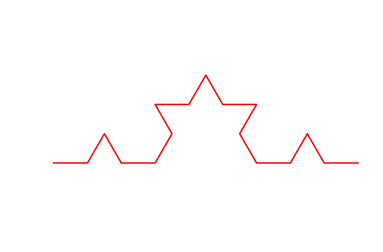

Rekursionsschritt: 2
Umfang (in LE): 1.7778


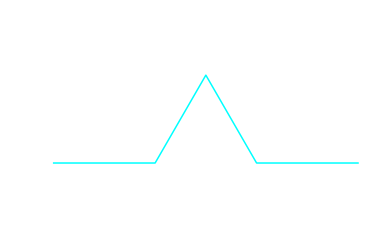

Rekursionsschritt: 1
Umfang (in LE): 1.3333


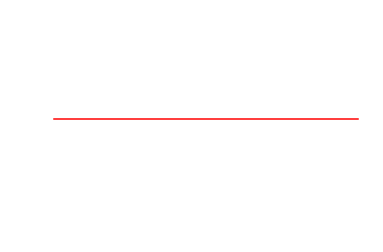

Rekursionsschritt: 0
Umfang (in LE): 1.0000


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor

colors = ['red', 'green', 'blue', 'magenta', 'cyan']
    
def snowflake(iterationsschritte):
        if iterationsschritte == -1: return
        n_lines = 4**iterationsschritte 
        h = 3**(-iterationsschritte) # Umsetzten unserer Formel L*(4/3)^n partiel
        x = [0]*(n_lines+1) # x Koordinaten 
        y = [0]*(n_lines+1) # y Koordinaten 
        abschnitte = [0] * iterationsschritte
        winkel=[0, np.pi/3, -np.pi/3, 0]   # Winkel 0° 60° 120° 0° für das drehen der richtung die wie laufen
        for i in range(n_lines):
            m=i
            winkel_=0
            for j in range(iterationsschritte):
                abschnitte[j] = np.mod(m, 4) #erfassen des aktuellen segments
                m = floor(m / 4) # Runden unseres Ergebnisses und versetzten des Segments
                winkel_ = winkel_ + winkel[int(abschnitte[j])] # berechnung des winkels in dessen richtung wir schauen
            x[i+1] = x[i] + h*np.cos(winkel_)
            y[i+1] = y[i] + h*np.sin(winkel_)           
        plotter(x,y,iterationsschritte) # Grafische Aufbereitung 
        snowflake(iterationsschritte - 1) # Rekursiver Aufruf der Schneeflocke

def randomColor():
    '''
    Method to return a random color
    '''
    return colors[randint(0, len(colors)-1)]

def umfang(n):
    print("Umfang (in LE): " + str(((4/3)^n).n(digits=5)))

def plotter(x,y, iterationsschritte):
    '''
    Plottermethod
    '''
    plt.plot(x, y, color=randomColor())
    plt.axis('off')
    plt.axes().set_aspect('equal', 'datalim')
    plt.show()
    print("Rekursionsschritt: " + str(iterationsschritte))
    umfang(iterationsschritte) # Berechnung des Umfangs 
    
    
if __name__ == "__main__":
    iterationsschritte = int(input("Anzahl der Iterationen >> "))
    snowflake(iterationsschritte)

